In [1]:
import pandas as pd
import numpy as np
columns = []
tableData = []

student_vle = pd.read_csv("data/studentVle.csv")
student_info = pd.read_csv("data/studentInfo.csv")
assesments = pd.read_csv("data/assessments.csv")
student_assessments = pd.read_csv("data/studentAssessment.csv")
student_registration = pd.read_csv("data/studentRegistration.csv")

studentRegistration = student_registration[(student_registration.code_module == 'AAA') & (student_registration.code_presentation == '2013J')]

student_info = student_info[(student_info.code_module == 'AAA') & (student_info.code_presentation == '2013J')]
student_info = student_info[['id_student','highest_education', 'final_result']]
tableData = student_info[['id_student','highest_education', 'final_result']]
columns = ['id_student','highest_education', 'final_result']
tableData.head(5)



,id_student,highest_education,final_result
0,11391,HE Qualification,Pass
1,28400,HE Qualification,Pass
2,30268,A Level or Equivalent,Withdrawn
3,31604,A Level or Equivalent,Pass
4,32885,Lower Than A Level,Pass


In [2]:
tableData.count()

id_student           383
highest_education    383
final_result         383
dtype: int64

In [3]:
assesments = assesments[(assesments.code_module == 'AAA') & (assesments.code_presentation == '2013J')]
assesmentIds = assesments['id_assessment']
for i in range(len(assesmentIds)): 
    columns.append(str(assesmentIds[i]))

In [4]:
for i in range(len(assesmentIds)): 
    columns.append('S' + str(assesmentIds[i]))

In [5]:
allColumns = ['TSC', 'TDC','excellent','qualified','AS','EwC']
for i in range(len(allColumns)): 
    columns.append(str(allColumns[i]))

In [6]:
featureTable = pd.DataFrame(data =tableData, columns = columns)
featureTable.head(5)

,id_student,highest_education,final_result,1752,1753,1754,1755,1756,1757,S1752,...,S1754,S1755,S1756,S1757,TSC,TDC,excellent,qualified,AS,EwC
0,11391,HE Qualification,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28400,HE Qualification,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30268,A Level or Equivalent,Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31604,A Level or Equivalent,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32885,Lower Than A Level,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
studentVle = student_vle[(student_vle.code_module == 'AAA') & (student_vle.code_presentation == '2013J')]
studentVle.head(5)

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [8]:
for index, row in featureTable.iterrows():
    studentVle = student_vle[student_vle.id_student == row.id_student]
    featureTable.at[index,'TSC'] = studentVle.sum_click.sum()
    featureTable.at[index,'TDC'] = studentVle.date.count()
    studentAssesments = student_assessments[student_assessments.id_student == row.id_student]
    count = 0
    total = 0
    for index1, row1 in studentAssesments.iterrows():
        if(row1.id_assessment  == 1752):
            featureTable.at[index, '1752'] = 1
            featureTable.at[index, 'S1752'] = row1.score
            total += row1.score
            count +=1
        elif(row1.id_assessment  == 1753):
            featureTable.at[index, '1753'] = 1
            featureTable.at[index, 'S1753'] = row1.score
            total += row1.score
            count +=1
        elif(row1.id_assessment  == 1754):
            featureTable.at[index, '1754'] = 1
            featureTable.at[index, 'S1754'] = row1.score
            total += row1.score
            count +=1
        elif(row1.id_assessment  == 1755):
            featureTable.at[index, '1755'] = 1
            featureTable.at[index, 'S1755'] = row1.score
            total += row1.score
            count +=1
        elif(row1.id_assessment  == 1756):
            featureTable.at[index, '1756'] = 1 
            featureTable.at[index, 'S1756'] = row1.score
            total += row1.score
            count +=1
        elif(row1.id_assessment  == 1757):
            featureTable.at[index, '1757'] = 1
            featureTable.at[index, 'S1757'] = row1.score
            total += row1.score
            count +=1
        if(count!= 0):
            average = total/count
            if(average > 60): 
                featureTable.at[index, 'excellent'] = 1
            else: 
                featureTable.at[index, 'excellent'] = 0
    if(row.final_result == 'Pass'):
        featureTable.at[index, 'qualified'] = 1
featureTable.fillna(0, inplace=True)
featureTable.head(5)

,id_student,highest_education,final_result,1752,1753,1754,1755,1756,1757,S1752,...,S1754,S1755,S1756,S1757,TSC,TDC,excellent,qualified,AS,EwC
0,11391,HE Qualification,Pass,1.0,1.0,1.0,1.0,1.0,0.0,78.0,...,80.0,85.0,82.0,0.0,934.0,196.0,1.0,1.0,0.0,0.0
1,28400,HE Qualification,Pass,1.0,1.0,1.0,1.0,1.0,0.0,70.0,...,70.0,64.0,60.0,0.0,1435.0,430.0,1.0,1.0,0.0,0.0
2,30268,A Level or Equivalent,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,281.0,76.0,0.0,0.0,0.0,0.0
3,31604,A Level or Equivalent,Pass,1.0,1.0,1.0,1.0,1.0,0.0,72.0,...,74.0,88.0,75.0,0.0,2158.0,663.0,1.0,1.0,0.0,0.0
4,32885,Lower Than A Level,Pass,1.0,1.0,1.0,1.0,1.0,0.0,69.0,...,63.0,35.0,75.0,0.0,1034.0,352.0,0.0,1.0,0.0,0.0


In [9]:
meanTSC = featureTable.TSC.mean()
for index, row in featureTable.iterrows():
    if(row.TSC > meanTSC):
        featureTable.at[index, 'AS'] = 1 
    if(bool(row.excellent) | (bool(row.qualified) and bool(row.AS))):
        featureTable.at[index, 'EwC'] = 1
feature_df=featureTable
feature_df.head(5)

,id_student,highest_education,final_result,1752,1753,1754,1755,1756,1757,S1752,...,S1754,S1755,S1756,S1757,TSC,TDC,excellent,qualified,AS,EwC
0,11391,HE Qualification,Pass,1.0,1.0,1.0,1.0,1.0,0.0,78.0,...,80.0,85.0,82.0,0.0,934.0,196.0,1.0,1.0,0.0,1.0
1,28400,HE Qualification,Pass,1.0,1.0,1.0,1.0,1.0,0.0,70.0,...,70.0,64.0,60.0,0.0,1435.0,430.0,1.0,1.0,0.0,1.0
2,30268,A Level or Equivalent,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,281.0,76.0,0.0,0.0,0.0,0.0
3,31604,A Level or Equivalent,Pass,1.0,1.0,1.0,1.0,1.0,0.0,72.0,...,74.0,88.0,75.0,0.0,2158.0,663.0,1.0,1.0,1.0,1.0
4,32885,Lower Than A Level,Pass,1.0,1.0,1.0,1.0,1.0,0.0,69.0,...,63.0,35.0,75.0,0.0,1034.0,352.0,0.0,1.0,0.0,0.0


In [10]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics

from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
feature_df = feature_df.drop(labels='highest_education', axis=1, level=None, inplace=False)
feature_df = feature_df.drop(labels='id_student', axis=1, level=None, inplace=False)
feature_df = feature_df.drop(labels='excellent', axis=1, level=None, inplace=False)
feature_df = feature_df.drop(labels='qualified', axis=1, level=None, inplace=False)
feature_df = feature_df.drop(labels='AS', axis=1, level=None, inplace=False)
feature_df.head()

,final_result,1752,1753,1754,1755,1756,1757,S1752,S1753,S1754,S1755,S1756,S1757,TSC,TDC,EwC
0,Pass,1.0,1.0,1.0,1.0,1.0,0.0,78.0,85.0,80.0,85.0,82.0,0.0,934.0,196.0,1.0
1,Pass,1.0,1.0,1.0,1.0,1.0,0.0,70.0,68.0,70.0,64.0,60.0,0.0,1435.0,430.0,1.0
2,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.0,76.0,0.0
3,Pass,1.0,1.0,1.0,1.0,1.0,0.0,72.0,71.0,74.0,88.0,75.0,0.0,2158.0,663.0,1.0
4,Pass,1.0,1.0,1.0,1.0,1.0,0.0,69.0,30.0,63.0,35.0,75.0,0.0,1034.0,352.0,0.0


# label encoder string to numeric 'final_result'

In [12]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(feature_df.final_result)
feature_df.final_result= encoder.transform(feature_df.final_result)

In [13]:
feature_df.head()

,final_result,1752,1753,1754,1755,1756,1757,S1752,S1753,S1754,S1755,S1756,S1757,TSC,TDC,EwC
0,2,1.0,1.0,1.0,1.0,1.0,0.0,78.0,85.0,80.0,85.0,82.0,0.0,934.0,196.0,1.0
1,2,1.0,1.0,1.0,1.0,1.0,0.0,70.0,68.0,70.0,64.0,60.0,0.0,1435.0,430.0,1.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.0,76.0,0.0
3,2,1.0,1.0,1.0,1.0,1.0,0.0,72.0,71.0,74.0,88.0,75.0,0.0,2158.0,663.0,1.0
4,2,1.0,1.0,1.0,1.0,1.0,0.0,69.0,30.0,63.0,35.0,75.0,0.0,1034.0,352.0,0.0


In [14]:
# feature_df = feature_df.apply(pd.to_numeric)

In [15]:
#Total Number of Continous and Categorical features in the training set
num_cols = feature_df._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 16


# input matrix X

In [16]:
X = feature_df.iloc[:,0:15]
X = np.array(X).astype(np.float64)
print(X)

[[2.000e+00 1.000e+00 1.000e+00 ... 0.000e+00 9.340e+02 1.960e+02]
 [2.000e+00 1.000e+00 1.000e+00 ... 0.000e+00 1.435e+03 4.300e+02]
 [3.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 2.810e+02 7.600e+01]
 ...
 [2.000e+00 0.000e+00 1.000e+00 ... 0.000e+00 4.720e+02 2.240e+02]
 [2.000e+00 1.000e+00 1.000e+00 ... 0.000e+00 4.218e+03 1.255e+03]
 [2.000e+00 1.000e+00 1.000e+00 ... 0.000e+00 7.580e+02 2.670e+02]]


# output matrix y

In [17]:
y= feature_df.iloc[:,15:16]
y= y.unstack()
y= np.array(y).astype(int)
print(y)

[1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0
 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 1 1 1 0 1 1]


# train and test data splitted 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

# knn model: classification report , confusion matrix and ROC-AUC curve

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) 
y_pred_knn = knn.predict(X_test)
print('Test set score for Knn: %f' % knn.score(X_test, y_test ))
print('Accuracy score for Knn: %f' % accuracy_score(y_test, y_pred_knn))

Test set score for Knn: 0.812500
Accuracy score for Knn: 0.812500


In [20]:
class_names = ['Not Engagement', 'Engagement']
print(classification_report(y_test, y_pred_knn, target_names=class_names))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_knn))

                precision    recall  f1-score   support

Not Engagement       0.71      0.56      0.63        27
    Engagement       0.84      0.91      0.87        69

     micro avg       0.81      0.81      0.81        96
     macro avg       0.78      0.73      0.75        96
  weighted avg       0.80      0.81      0.80        96

Confusion matrix: 
 [[15 12]
 [ 6 63]]


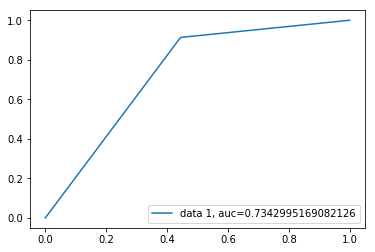

In [21]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_knn)
auc = metrics.roc_auc_score(y_test, y_pred_knn)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
y_pred_knn

# svm model: classification report , confusion matrix and ROC-AUC curve

In [ ]:
clf= svm.SVC()
clf.fit(X_train, y_train)
y_pred_svm= clf.predict(X_test)
print('Test set score for svm: %f' % clf.score(X_test, y_test))
print('Accuracy score for svm: %f' % accuracy_score(y_test, y_pred_svm))

class_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_svm, target_names=class_names))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_svm))

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_svm)
auc = metrics.roc_auc_score(y_test, y_pred_svm)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Decision Tree model: classification report , confusion matrix and ROC-AUC curve

In [ ]:
dt=  DecisionTreeClassifier()
dt.fit(X_train, y_train) 
y_pred_dt = dt.predict(X_test)
print('Test set score for dt: %f' % dt.score(X_test, y_test))
print('Accuracy score for dt: %f' % accuracy_score(y_test, y_pred_dt))

class_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_dt, target_names=class_names))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_dt))

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_dt)
auc = metrics.roc_auc_score(y_test, y_pred_dt)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Parameter tuning for svm, finding best parameter to train the model

In [ ]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


In [ ]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(svm.SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(X_test)

In [ ]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train, y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test, y_test ))

svm_model.score